In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

                                    DATA CLEANING

In [4]:
#clean and merge exam data

from exam_performance_analysis.data_cleaning import clean_and_merge_exam_data

first = pd.read_csv("data/Midterm_1_scores.csv")
second = pd.read_csv("data/Midterm_2_scores.csv")
final = pd.read_csv("data/Final_scores.csv")

first_midterm_total_points = 110
second_midterm_total_points = 110
final_total_points = 170
first_midterm_weight = 20
second_midterm_weight = 25
final_weight = 35

exams = clean_and_merge_exam_data(first, second, final, first_midterm_total_points, second_midterm_total_points, final_total_points, first_midterm_weight, second_midterm_weight, final_weight)
exams.shape, exams.columns

((766, 10),
 Index(['SID', 'M1', 'M2', 'Final', 'View Count M1', 'View Count M2',
        'View Count Final', 'View Count Exam Total', 'View Per Exam',
        'Scaled Exam Score'],
       dtype='object'))

In [5]:
exams.describe()

,M1,M2,Final,View Count M1,View Count M2,View Count Final,View Count Exam Total,View Per Exam,Scaled Exam Score
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.00000,766.000000,766.000000,766.000000
mean,64.073068,75.429504,90.240213,5.104439,5.791123,3.50000,14.395561,4.798520,47.371585
std,14.453187,16.633091,28.871725,4.455685,7.508129,4.18455,12.782808,4.260936,10.870725
min,19.500000,24.000000,17.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.366310
25%,54.000000,65.000000,69.000000,2.000000,2.000000,1.00000,7.000000,2.333333,39.783422
50%,63.250000,76.500000,88.500000,4.000000,4.000000,2.00000,12.000000,4.000000,47.167112
75%,73.000000,87.500000,109.500000,6.000000,7.000000,5.00000,18.000000,6.000000,54.536096
max,108.000000,110.000000,164.990000,57.000000,140.000000,66.00000,164.000000,54.666667,77.957219


In [6]:
#clean and merge homework data

from exam_performance_analysis.data_cleaning import clean_and_merge_homework_data

h0=pd.read_csv("data/Homework_1_scores.csv")
h1=pd.read_csv("data/Homework_2_scores.csv")
h2=pd.read_csv("data/Homework_3_scores.csv")
h3=pd.read_csv("data/Homework_5_scores.csv")
h4=pd.read_csv("data/Homework_6_scores.csv")
h5=pd.read_csv("data/Homework_7_scores.csv")
h6=pd.read_csv("data/Homework_8_scores.csv")
h7=pd.read_csv("data/Homework_9_scores.csv")
h8=pd.read_csv("data/Homework_11_scores.csv")
h9=pd.read_csv("data/Homework_12_scores.csv")
h10=pd.read_csv("data/Homework_13_scores.csv")
h11=pd.read_csv("data/Homework_14_scores.csv")

hws = [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11]
hw_total_scores = [11, 60, 56, 65, 46, 55, 55, 50, 50, 55, 41, 40]
merged_hws = clean_and_merge_homework_data(hws, hw_total_scores, exams)
merged_hws.shape, merged_hws.columns

((766, 37),
 Index(['SID', 'Total Score, HW 0', 'View Count, HW 0', 'Submission Time, HW 0',
        'Total Score, HW 1', 'View Count, HW 1', 'Submission Time, HW 1',
        'Total Score, HW 2', 'View Count, HW 2', 'Submission Time, HW 2',
        'Total Score, HW 3', 'View Count, HW 3', 'Submission Time, HW 3',
        'Total Score, HW 4', 'View Count, HW 4', 'Submission Time, HW 4',
        'Total Score, HW 5', 'View Count, HW 5', 'Submission Time, HW 5',
        'Total Score, HW 6', 'View Count, HW 6', 'Submission Time, HW 6',
        'Total Score, HW 7', 'View Count, HW 7', 'Submission Time, HW 7',
        'Total Score, HW 8', 'View Count, HW 8', 'Submission Time, HW 8',
        'Total Score, HW 9', 'View Count, HW 9', 'Submission Time, HW 9',
        'Total Score, HW 10', 'View Count, HW 10', 'Submission Time, HW 10',
        'Total Score, HW 11', 'View Count, HW 11', 'Submission Time, HW 11'],
       dtype='object'))

                                    DATA WRANGLING

We extract from the following features (per student):

From homework data:
1. Number of submissions
2. Overall homework grade
3. Overall homework views
4. Time of homework submission before deadline

From exam data:
5. Overall exam views
6. Overall exam score

Other:
7. Gender

In [7]:
#1. Number of homework submissions

from exam_performance_analysis.data_wrangling import number_of_homework_submissions_by_student

number_of_submissions = number_of_homework_submissions_by_student(merged_hws, len(hws))

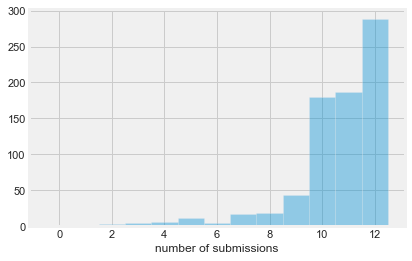

In [8]:
sns.distplot(number_of_submissions, bins=np.arange(-0.5, 13.5, 1), kde=False)

In [9]:
number_of_submissions.describe()

count    766.000000
mean      10.577023
std        1.823935
min        0.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       12.000000
Name: number of submissions, dtype: float64

In [10]:
[np.count_nonzero(number_of_submissions==i) for i in range(13)]

[1, 1, 3, 5, 6, 11, 5, 17, 19, 43, 180, 187, 288]

In [11]:
[np.round(np.count_nonzero(number_of_submissions==i)/len(number_of_submissions), 2) for i in range(13)]

[0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.06, 0.23, 0.24, 0.38]

In [12]:
#DROP STUDENTS WHO SUBMITTED 0 HWs
merged_hws["Number of Submissions"] = number_of_submissions
threshold = 1
merged_hws = merged_hws[merged_hws["Number of Submissions"] >= threshold]
merged_hws = merged_hws.reset_index(drop=True)
merged_hws.shape

(765, 38)

In [13]:
#2. Homework Grades

from exam_performance_analysis.data_wrangling import overall_hw_grade_by_student

overall_hw_grade = overall_hw_grade_by_student(merged_hws, len(hws))
overall_hw_grade.describe()

count    765.000000
mean       0.779133
std        0.125381
min        0.200000
25%        0.711854
50%        0.797653
75%        0.871975
max        0.996858
Name: overall percentage, dtype: float64

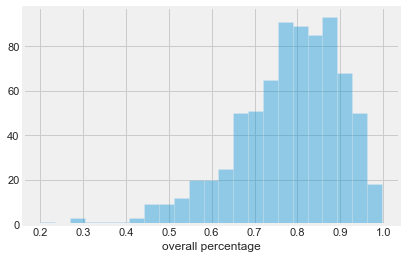

In [14]:
sns.distplot(overall_hw_grade, kde=False)

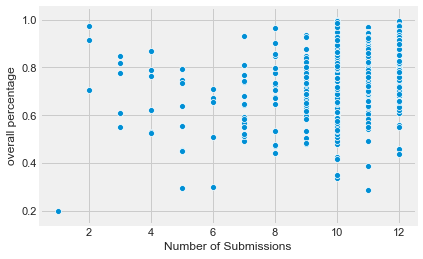

In [15]:
sns.scatterplot(merged_hws["Number of Submissions"], overall_hw_grade)

In [16]:
#3. Homework views

from exam_performance_analysis.data_wrangling import hw_views_by_student

hw_views = hw_views_by_student(merged_hws, len(hws))

In [17]:
hw_views.describe()

count    765.000000
mean       2.083108
std        1.502177
min        0.000000
25%        1.090909
50%        1.750000
75%        2.600000
max       11.200000
Name: average number of views per hw, dtype: float64

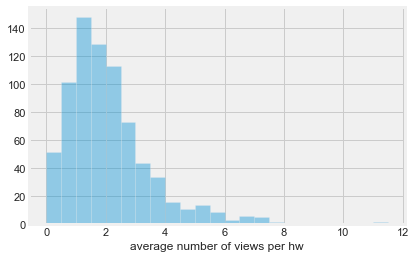

In [18]:
sns.distplot(hw_views, bins = np.arange(0, 12, 0.5), kde=False)

In [19]:
#4. Time of homework submission before deadline

from exam_performance_analysis.data_wrangling import hw_submission_time_before_deadline_by_student

deadlines = [
    pd.to_datetime('2019-01-28 23:59:59 -0800'), 
    pd.to_datetime('2019-02-04 23:59:59 -0800'), 
    pd.to_datetime('2019-02-11 23:59:59 -0800'), 
    pd.to_datetime('2019-02-25 23:59:59 -0800'), 
    pd.to_datetime('2019-03-04 23:59:59 -0800'), 
    [
        pd.to_datetime('2019-03-11 23:59:59 -0800'), 
        pd.to_datetime('2019-03-11 23:59:59 -0700'), #daylight savings time change
    ],  
    pd.to_datetime('2019-03-18 23:59:59 -0700'), 
    pd.to_datetime('2019-04-01 23:59:59 -0700'), 
    pd.to_datetime('2019-04-15 23:59:59 -0700'), 
    pd.to_datetime('2019-04-22 23:59:59 -0700'), 
    pd.to_datetime('2019-04-29 23:59:59 -0700'), 
    pd.to_datetime('2019-05-06 23:59:59 -0700'),
]

median_submission_times_before_deadline_by_student, mean_submission_times_before_deadline_by_student = hw_submission_time_before_deadline_by_student(merged_hws, deadlines, len(hws))

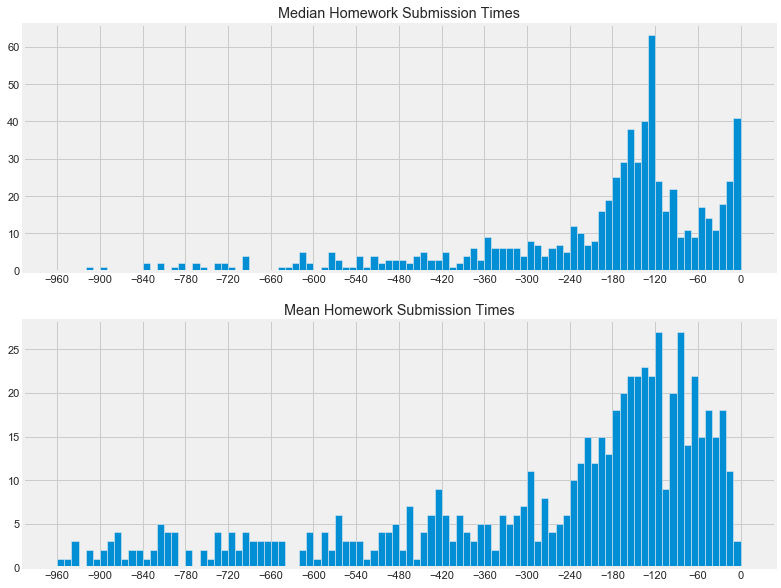

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
start = -960
end = 1

axes[0].hist(median_submission_times_before_deadline_by_student, bins=np.arange(start, end, 10))
axes[0].set_title('Median Homework Submission Times')
axes[0].set_xticks(np.arange(start,end,60))

axes[1].hist(mean_submission_times_before_deadline_by_student, bins=np.arange(start, end, 10))
axes[1].set_title('Mean Homework Submission Times')
buffer = axes[1].set_xticks(np.arange(start,end,60))

In [21]:
median_submission_times_before_deadline_by_student.describe()

count     765.000000
mean     -408.673845
std       811.993378
min     -8859.850000
25%      -340.000000
50%      -157.391667
75%      -106.508333
max        25.408333
dtype: float64

In [22]:
mean_submission_times_before_deadline_by_student.describe()

count     765.000000
mean     -533.699559
std       794.382671
min     -7920.509722
25%      -618.923333
50%      -217.205000
75%      -117.168182
max        66.977778
dtype: float64

In [23]:
np.percentile(median_submission_times_before_deadline_by_student, 70)

-121.80833333333334

In [24]:
#5. Exam views

from exam_performance_analysis.data_wrangling import exam_views_by_student

exam_views = exam_views_by_student(merged_hws, exams)
exam_views.shape, exam_views.columns

((765, 6), Index(['SID', 'View Count M1', 'View Count M2', 'View Count Final',
        'View Count Exam Total', 'View Per Exam'],
       dtype='object'))

In [25]:
exam_views["View Count M1"].describe(), np.percentile(exam_views["View Count M1"], 99)

(count    765.000000
 mean       5.103268
 std        4.458482
 min        0.000000
 25%        2.000000
 50%        4.000000
 75%        6.000000
 max       57.000000
 Name: View Count M1, dtype: float64, 19.360000000000014)

In [26]:
exam_views["View Count M2"].describe(), np.percentile(exam_views["View Count M2"], 99)

(count    765.000000
 mean       5.794771
 std        7.512361
 min        0.000000
 25%        2.000000
 50%        4.000000
 75%        7.000000
 max      140.000000
 Name: View Count M2, dtype: float64, 31.0)

In [27]:
exam_views["View Count Final"].describe(), np.percentile(exam_views["View Count Final"], 99)

(count    765.000000
 mean       3.503268
 std        4.186309
 min        0.000000
 25%        1.000000
 50%        2.000000
 75%        5.000000
 max       66.000000
 Name: View Count Final, dtype: float64, 17.720000000000027)

In [28]:
exam_views["View Per Exam"].describe(), np.percentile(exam_views["View Per Exam"], 99)

(count    765.000000
 mean       4.800436
 std        4.263394
 min        0.000000
 25%        2.333333
 50%        4.000000
 75%        6.000000
 max       54.666667
 Name: View Per Exam, dtype: float64, 17.666666666666668)

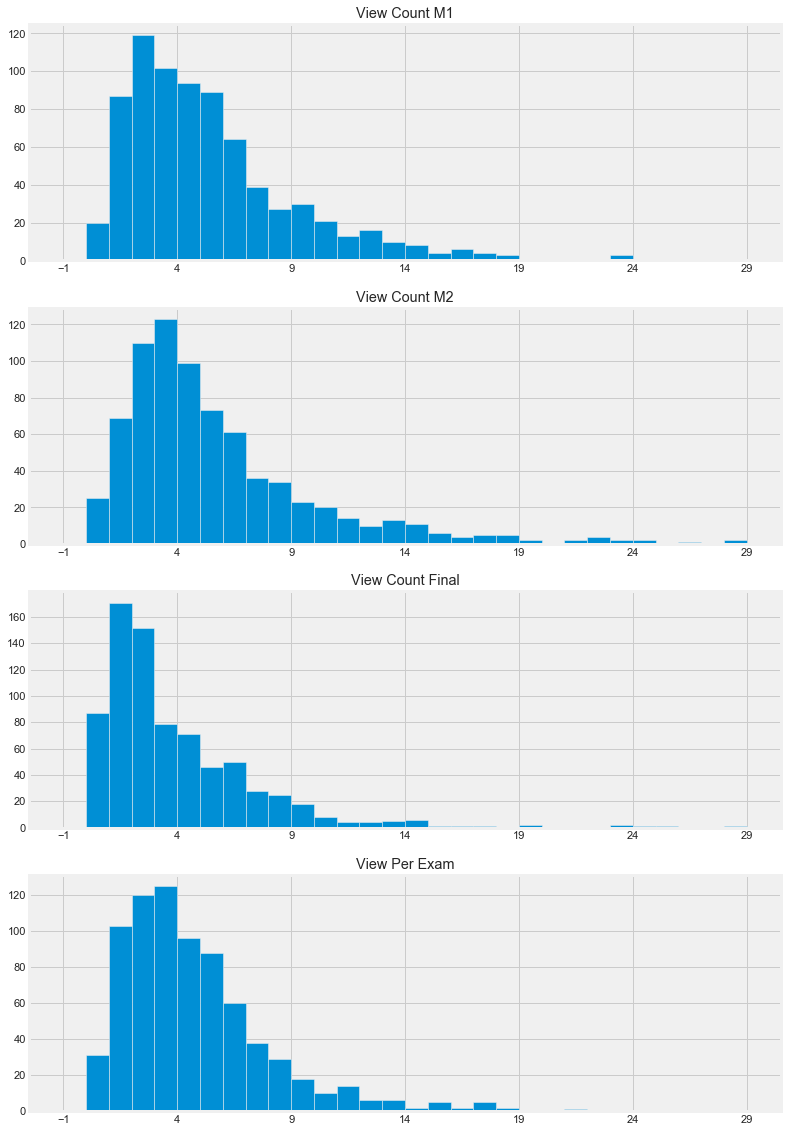

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))
start = -1
end = 30

variables = ["View Count M1", "View Count M2", "View Count Final", "View Per Exam"]
for i in np.arange(0,4):
    axes[i].hist(exam_views[variables[i]], bins=np.arange(start, end, 1))
    axes[i].set_title(variables[i])
    axes[i].set_xticks(np.arange(start,end,5))

In [30]:
#6. Exam score (value to predict)

from exam_performance_analysis.data_wrangling import exam_scores_by_student

exam_scaled_scores = exam_scores_by_student(merged_hws, exams)

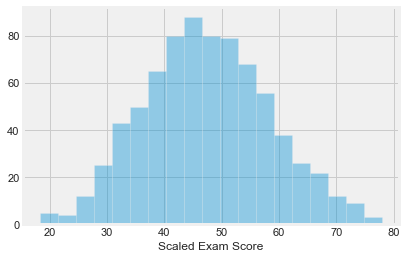

In [31]:
sns.distplot(exam_scaled_scores['Scaled Exam Score'], kde=False)

In [32]:
print("Median: %f " % np.median(exam_scaled_scores["Scaled Exam Score"]))
exam_scaled_scores.describe()

Median: 47.172460 


,Scaled Exam Score
count,765.000000
mean,47.402437
std,10.844228
min,18.366310
25%,39.799465
50%,47.172460
75%,54.572193
max,77.957219


In [33]:
#7. Gender

from exam_performance_analysis.data_wrangling import gender_by_student
from collections import Counter

genders = gender_by_student()

print(Counter(genders["Gender"]))
#0 is Male, 2 is Female, 1 is unknown

Counter({'M': 539, 'F': 185, 'Unknown': 41})


                    DATA EXPLORATION: VISUALIZE STATS BY HOMEWORK

In [34]:
def hw_scores_and_views_stats(n):
    return merged_hws.describe()[["Total Score, HW %d" %n, "View Count, HW %d" % n]]

hw_scores_and_views_stats(6)

,"Total Score, HW 6","View Count, HW 6"
count,599.000000,599.000000
mean,0.700804,2.202003
std,0.224433,2.455816
min,0.000000,0.000000
25%,0.545455,1.000000
50%,0.745455,1.000000
75%,0.890909,3.000000
max,1.000000,26.000000


In [35]:
#VISUALIZE SUBMISSION TIMES BY HOMEWORK
submission_time_titles = ['Submission Time, HW %d' % i for i in range(12)]
submission_times = merged_hws[submission_time_titles] #include ALL students for viz

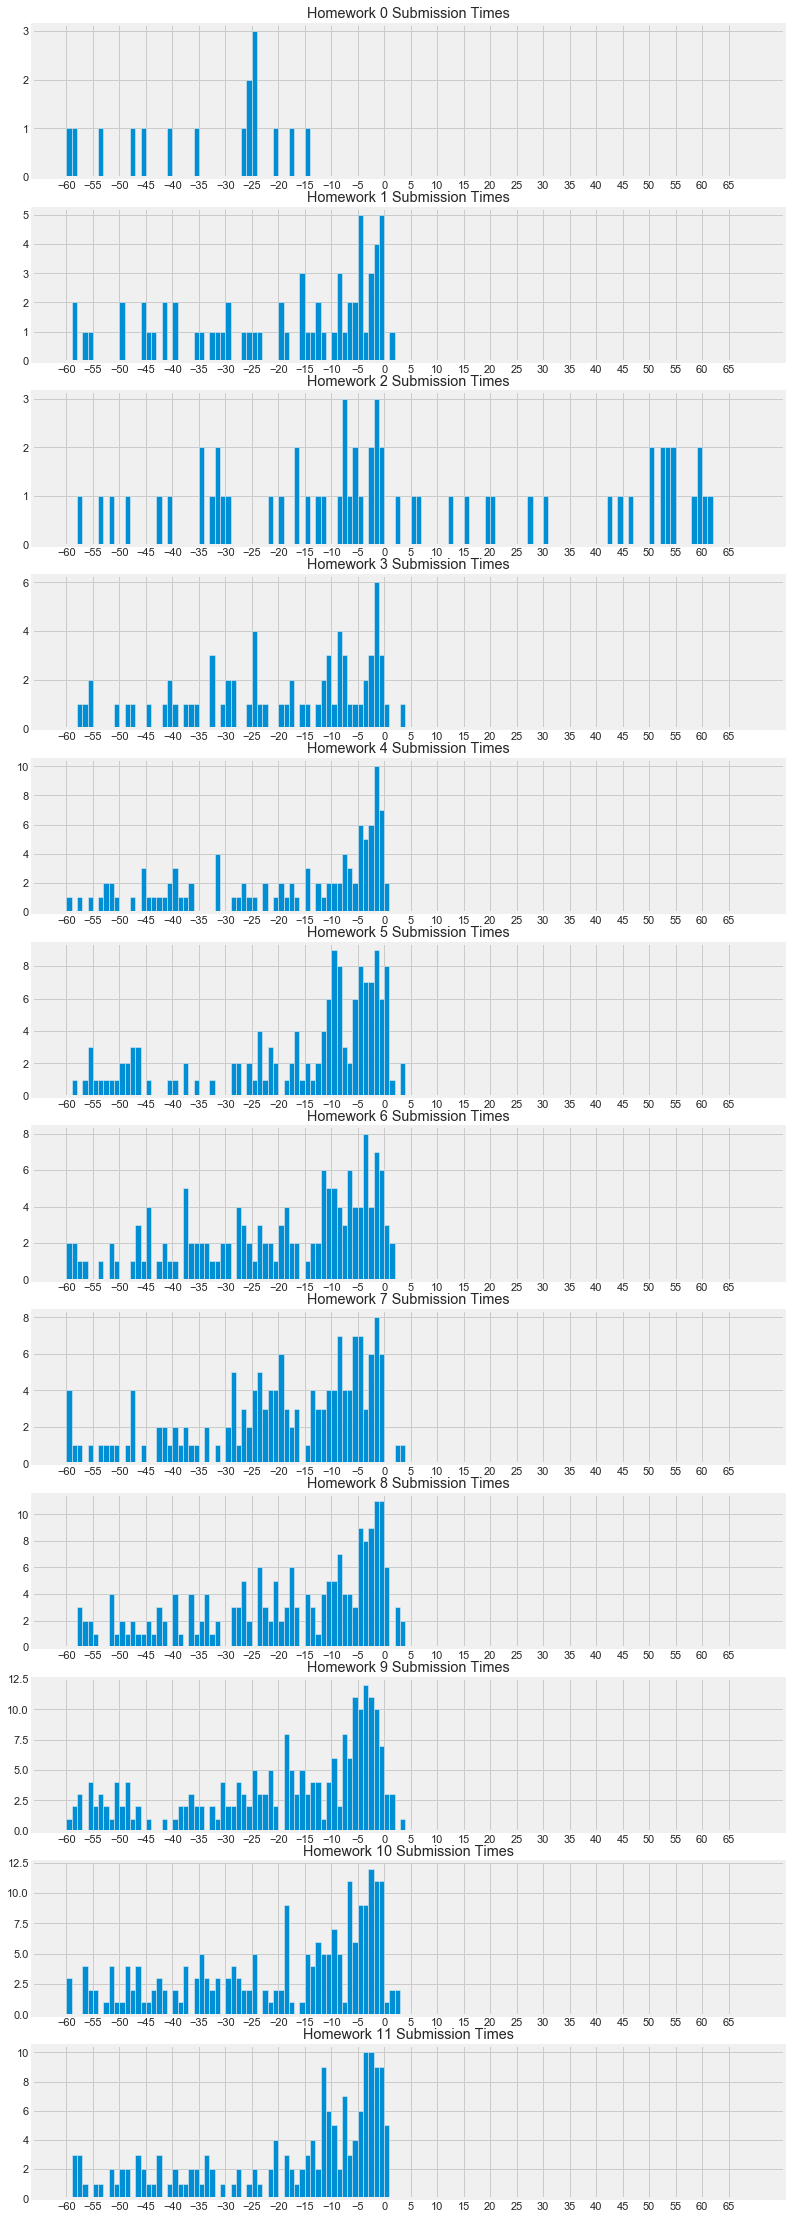

In [36]:
#5-minute overview

from exam_performance_analysis.data_wrangling import hw_submission_times

fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 40))
start = -60
end = 70

for i in np.arange(0,12):
    axes[i].hist(hw_submission_times(i, submission_times, deadlines).dropna(), bins=np.arange(start, end, 1))
    axes[i].set_title('Homework %d Submission Times' % i)
    axes[i].set_xticks(np.arange(start,end,5))

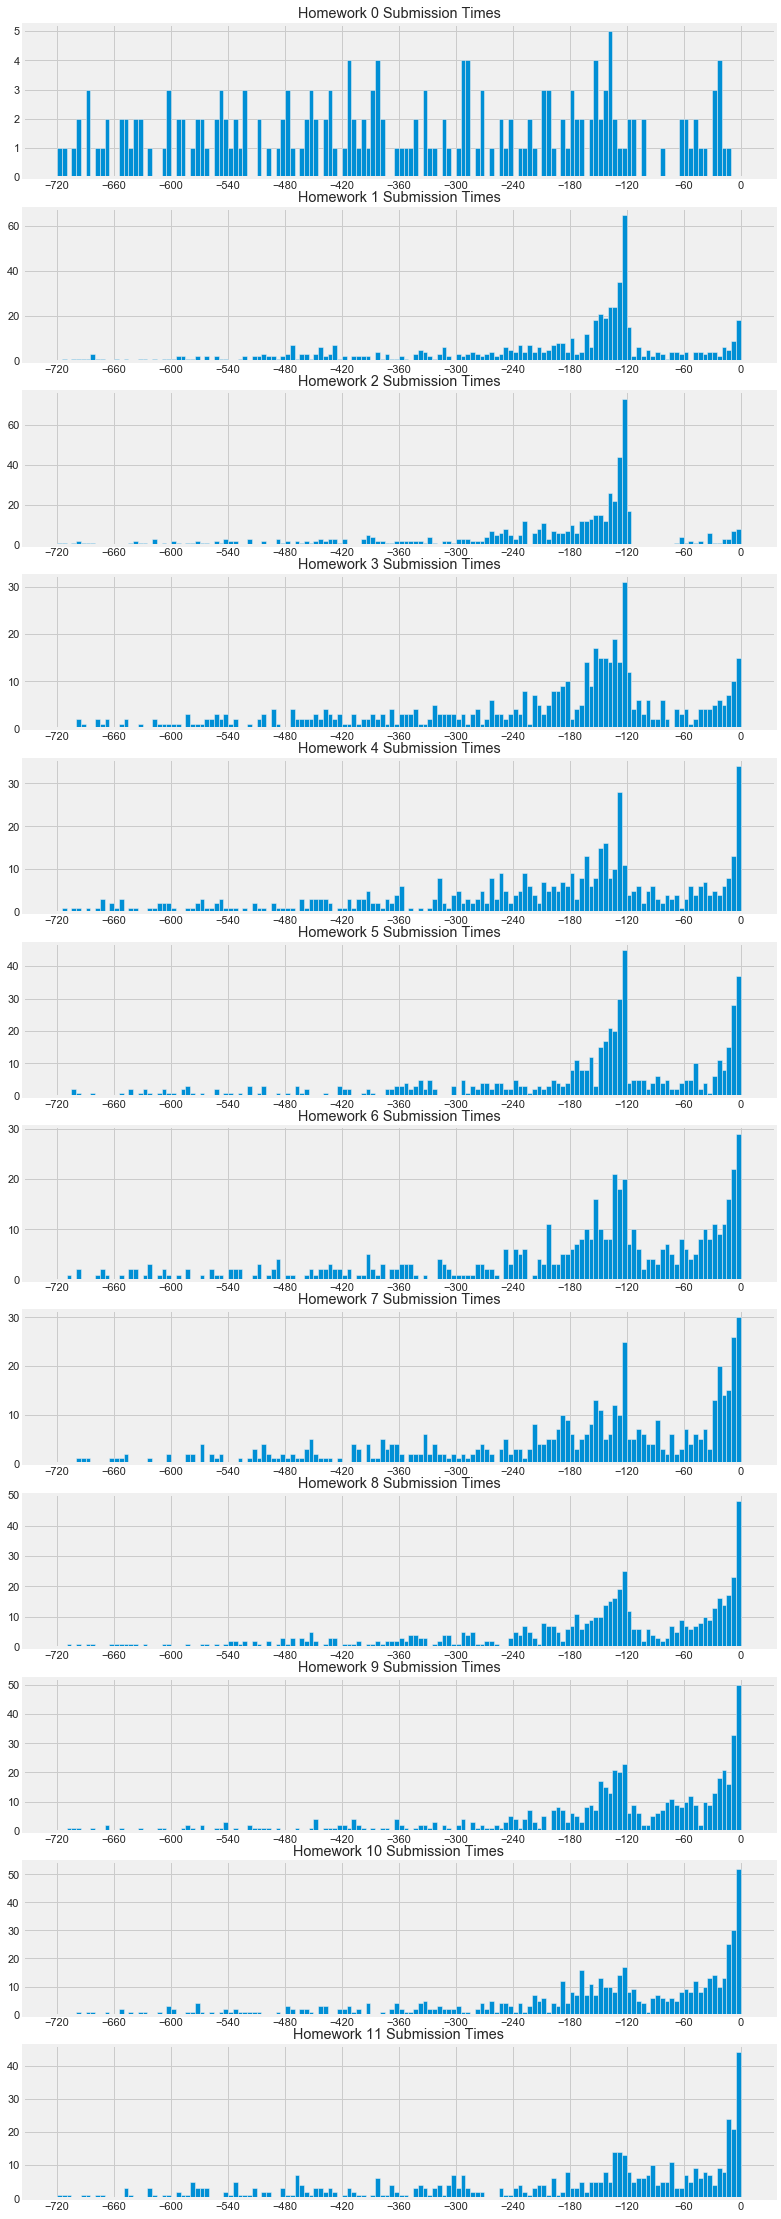

In [37]:
#hourly overview
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 40))
start = -720
end = 1

for i in np.arange(0,12):
    axes[i].hist(hw_submission_times(i, submission_times, deadlines).dropna(), bins=np.arange(start, end, 5))
    axes[i].set_title('Homework %d Submission Times' % i)
    axes[i].set_xticks(np.arange(start,end,60))

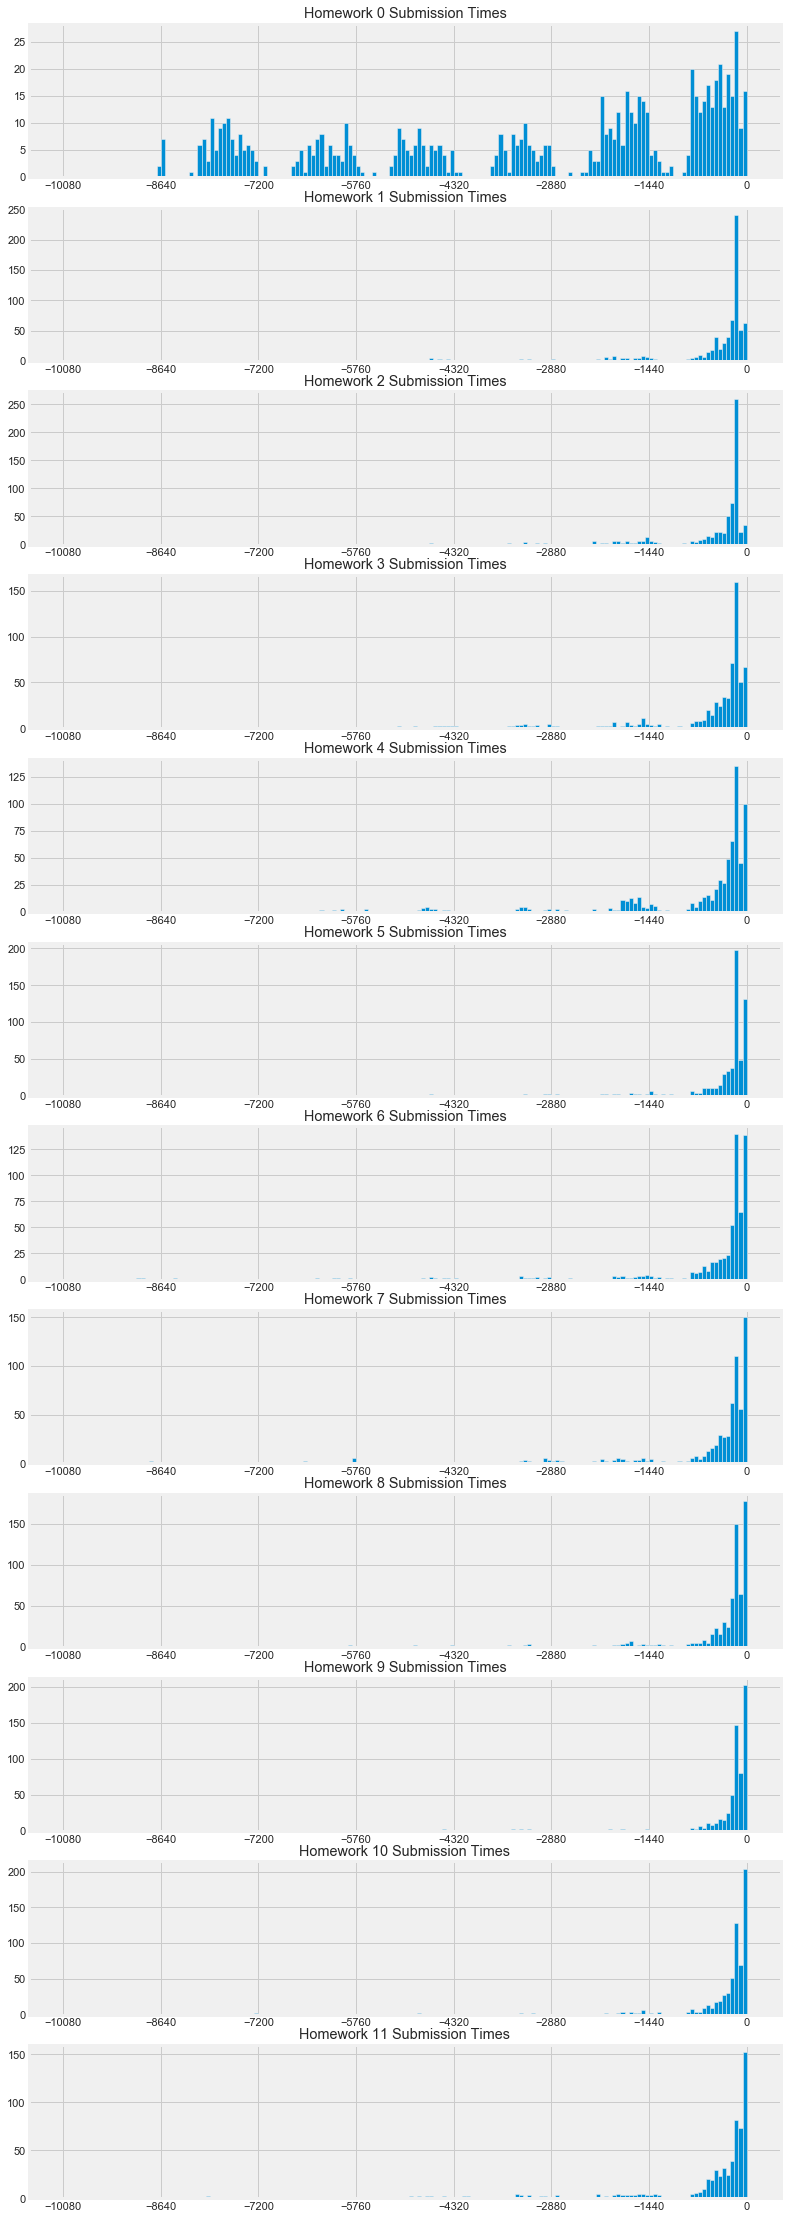

In [38]:
#weekly overview
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 40))
start = -10080
end = 1

for i in np.arange(0,12):
    axes[i].hist(hw_submission_times(i, submission_times, deadlines).dropna(), bins=np.arange(start, end, 60))
    axes[i].set_title('Homework %d Submission Times' % i)
    axes[i].set_xticks(np.arange(start,end,1440))

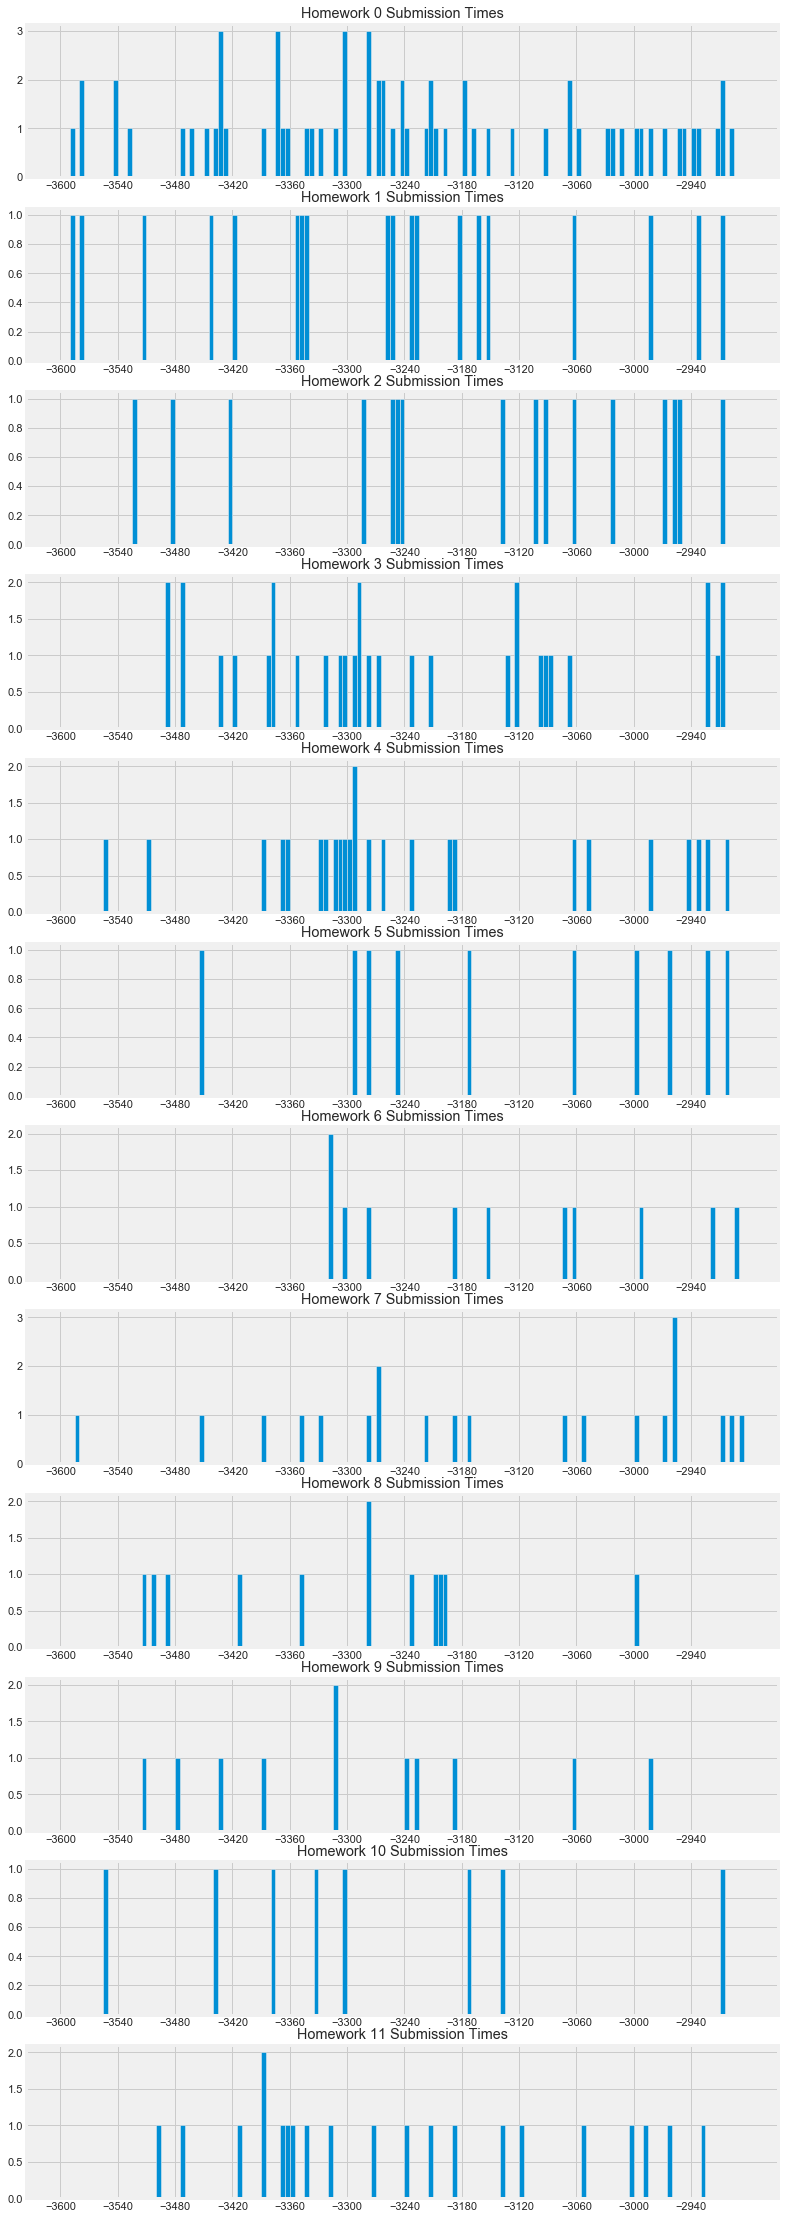

In [39]:
#insight into non-procrastinators
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 40))
start = -3600
end = -2880

for i in np.arange(0,12):
    axes[i].hist(hw_submission_times(i, submission_times, deadlines).dropna(), bins=np.arange(start, end, 5))
    axes[i].set_title('Homework %d Submission Times' % i)
    axes[i].set_xticks(np.arange(start,end,60))

                   DATA EXPLORATION: PAIRWISE FEATURE ASSOCIATIONS

In [40]:
from functools import reduce

f1 = merged_hws[["SID", "Number of Submissions"]]
f2 = pd.DataFrame(data={"SID": merged_hws["SID"], "HW %": overall_hw_grade})
f3 = pd.DataFrame(data={"SID": merged_hws["SID"], "View Per HW": hw_views}) 
f4 = pd.DataFrame(data={"SID": merged_hws["SID"], "Mean Time Before Deadline": mean_submission_times_before_deadline_by_student}) 
f5 = pd.DataFrame(data={"SID": merged_hws["SID"], "Median Time Before Deadline": median_submission_times_before_deadline_by_student}) 
f6 = exam_views[["SID", "View Per Exam"]]
f7 = exam_scaled_scores
f8 = genders

features = [f1, f2, f3, f4, f5, f6, f7, f8]
X = reduce(lambda left, right: pd.merge(left, right, on="SID", how="inner"), features)
X.drop(columns=["SID"]).head()

,Number of Submissions,HW %,View Per HW,Mean Time Before Deadline,Median Time Before Deadline,View Per Exam,Scaled Exam Score,Gender
0,12,0.953733,2.500000,-1830.208333,-1928.566667,6.000000,50.554813,M
1,12,0.915502,3.500000,-746.387500,-251.683333,4.666667,56.435829,M
2,10,0.691244,1.700000,-4591.751667,-6028.416667,5.000000,37.867647,M
3,11,0.796083,1.454545,-88.068182,-91.608333,3.333333,50.241979,Unknown
4,12,0.931005,2.083333,-3008.880556,-3317.016667,5.000000,70.346257,M


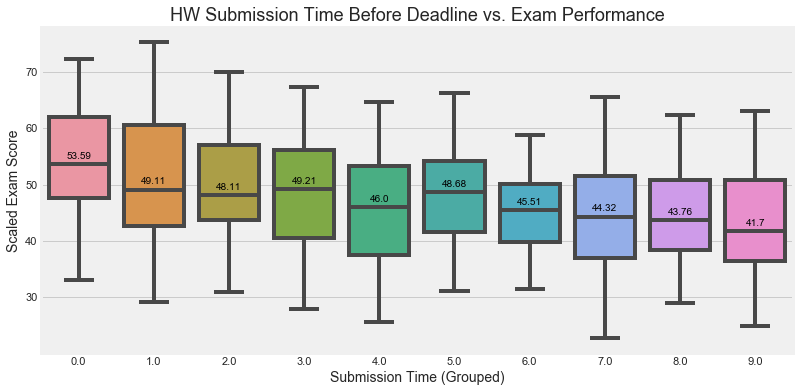

In [41]:
from exam_performance_analysis.data_exploration import time_vs_exam_performance_plot

p1, maxes, mins = time_vs_exam_performance_plot(X, 10, 1)

In [42]:
mins.merge(maxes, on="Group by Time of Submission").rename(columns = {"Median Time Before Deadline_x": "Median Submission Time Lower Bound", "Median Time Before Deadline_y": "Median Submission Time Upper Bound"})

,Median Submission Time Lower Bound,Median Submission Time Upper Bound
Group by Time of Submission,,
0.0,-8859.850000,-891.491667
1.0,-834.283333,-425.800000
2.0,-425.616667,-271.800000
3.0,-271.000000,-188.433333
4.0,-187.900000,-157.391667
5.0,-157.350000,-135.933333
6.0,-135.866667,-121.791667
7.0,-121.783333,-86.566667
8.0,-85.066667,-26.250000


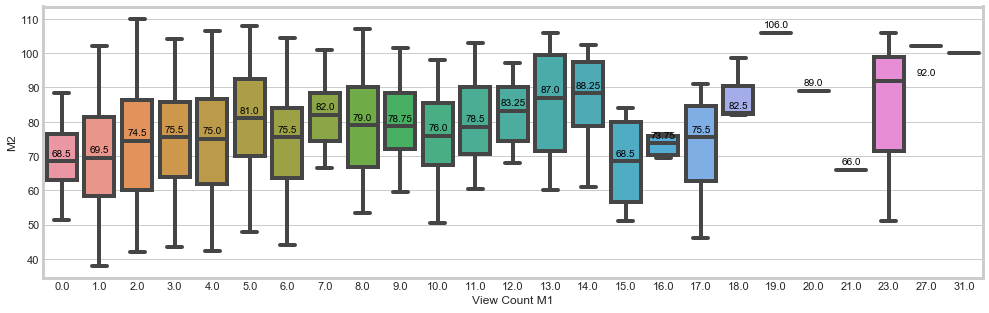

In [43]:
from exam_performance_analysis.data_exploration import mt1_views_vs_mt2_score_plot

mt1_views_vs_mt2_score_plot(exams)

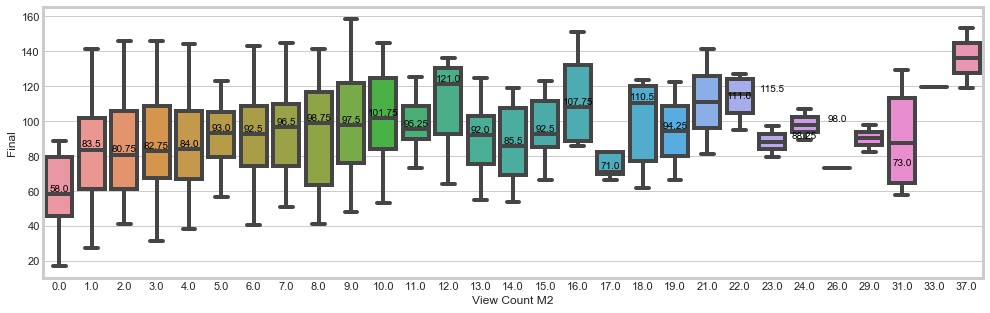

In [44]:
from exam_performance_analysis.data_exploration import mt2_views_vs_final_score_plot

mt2_views_vs_final_score_plot(exams)

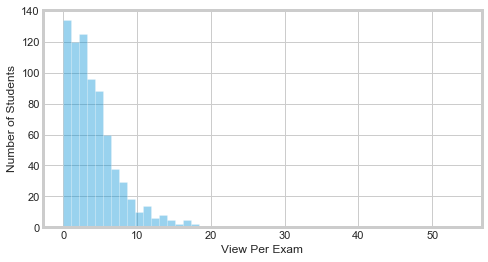

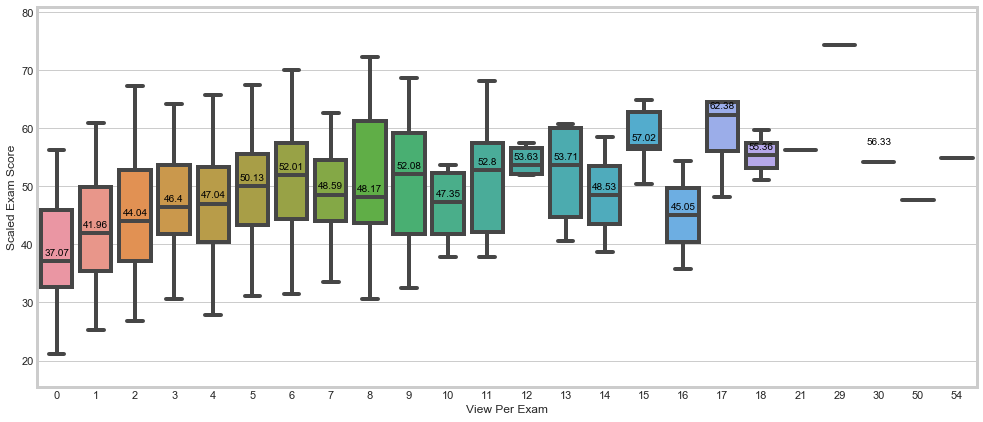

In [45]:
from exam_performance_analysis.data_exploration import views_per_exam_vs_exam_score

views_per_exam_vs_exam_score(X)

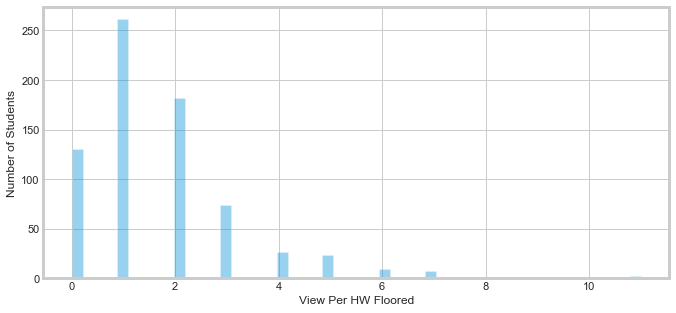

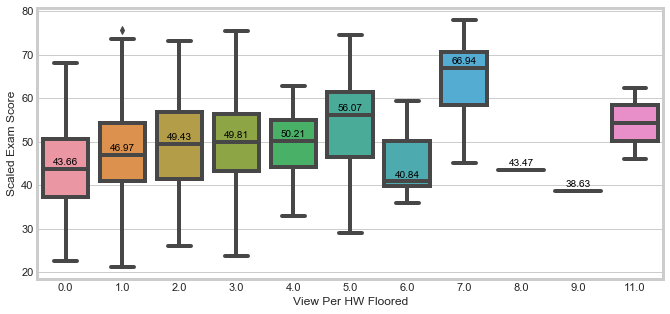

In [46]:
from exam_performance_analysis.data_exploration import hw_views_vs_exam_score

num_entries_threshold = 8
hw_views_vs_exam_score(X, num_entries_threshold)

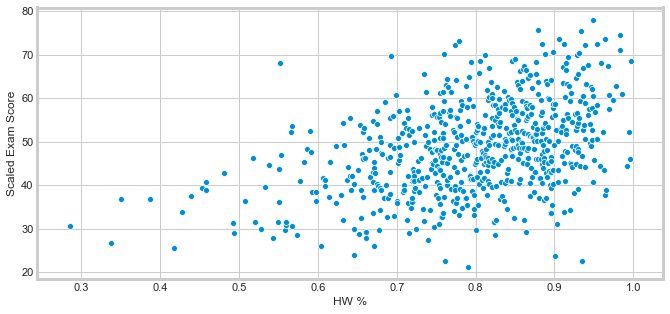

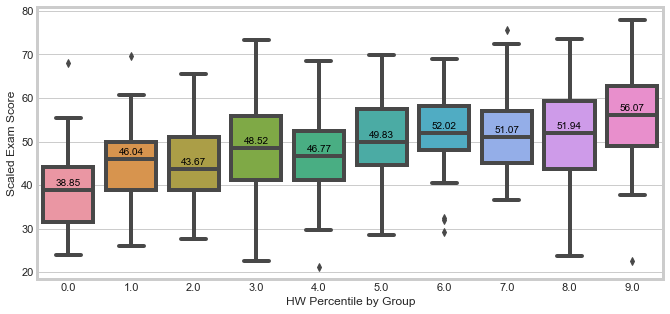

In [47]:
from exam_performance_analysis.data_exploration import hw_scores_vs_exam_scores

num_groups = 10
num_entries_threshold = 10
hw_scores_vs_exam_scores(X, num_groups, num_entries_threshold) 

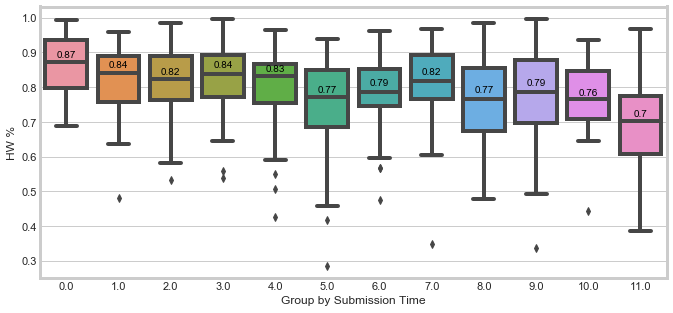

In [48]:
from exam_performance_analysis.data_exploration import time_vs_hw_score

num_groups = 12
num_entries_threshold = 8

p6, maxes, mins = time_vs_hw_score(X, num_groups, num_entries_threshold)

In [49]:
mins.merge(maxes, on="Group by Submission Time").rename(columns = {"Median Time Before Deadline_x": "Median Submission Time Lower Bound", "Median Time Before Deadline_y": "Median Submission Time Upper Bound"})

,Median Submission Time Lower Bound,Median Submission Time Upper Bound
Group by Submission Time,,
0.0,-8859.850000,-1368.450000
1.0,-1359.466667,-535.141667
2.0,-534.300000,-354.966667
3.0,-351.100000,-250.250000
4.0,-245.933333,-186.466667
5.0,-186.233333,-160.650000
6.0,-160.033333,-142.483333
7.0,-142.300000,-126.783333
8.0,-126.775000,-113.633333


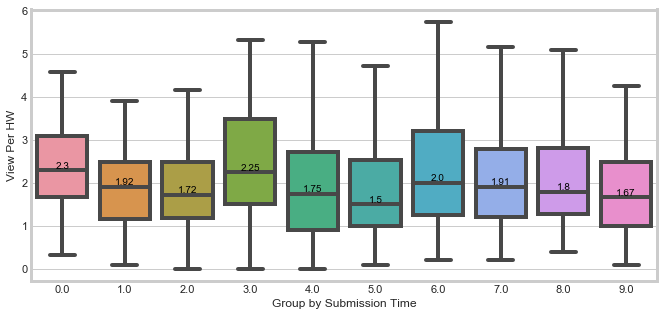

In [50]:
from exam_performance_analysis.data_exploration import time_vs_hw_views

num_groups = 10
num_entries_threshold = 10

p7, maxes, mins = time_vs_hw_views(X, num_groups, num_entries_threshold)

In [51]:
mins.merge(maxes, on="Group by Submission Time").rename(columns = {"Median Time Before Deadline_x": "Median Submission Time Lower Bound", "Median Time Before Deadline_y": "Median Submission Time Upper Bound"})

,Median Submission Time Lower Bound,Median Submission Time Upper Bound
Group by Submission Time,,
0.0,-8859.850000,-1251.350000
1.0,-1158.800000,-479.183333
2.0,-475.000000,-304.033333
3.0,-301.000000,-205.566667
4.0,-204.816667,-162.166667
5.0,-162.033333,-142.483333
6.0,-142.300000,-124.833333
7.0,-124.583333,-99.633333
8.0,-98.933333,-34.450000


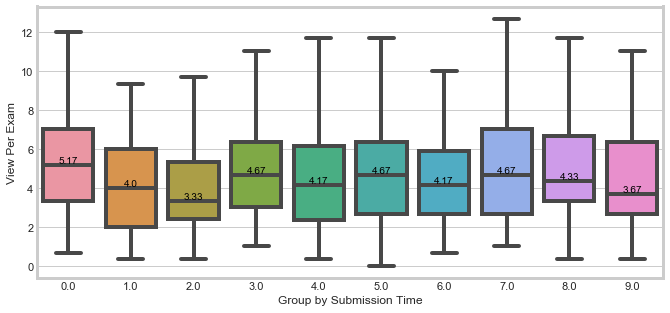

In [52]:
from exam_performance_analysis.data_exploration import time_vs_exam_views

num_groups = 10
num_entries_threshold = 10

p8, maxes, mins = time_vs_exam_views(X, num_groups, num_entries_threshold)

In [53]:
mins.merge(maxes, on="Group by Submission Time").rename(columns = {"Median Time Before Deadline_x": "Median Submission Time Lower Bound", "Median Time Before Deadline_y": "Median Submission Time Upper Bound"})

,Median Submission Time Lower Bound,Median Submission Time Upper Bound
Group by Submission Time,,
0.0,-8859.850000,-1251.350000
1.0,-1158.800000,-479.183333
2.0,-475.000000,-304.033333
3.0,-301.000000,-205.566667
4.0,-204.816667,-162.166667
5.0,-162.033333,-142.483333
6.0,-142.300000,-124.833333
7.0,-124.583333,-99.633333
8.0,-98.933333,-34.450000


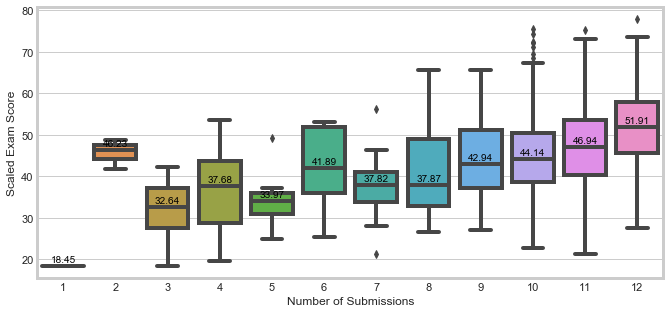

In [54]:
from exam_performance_analysis.data_exploration import num_hw_entries_vs_exam_score

num_hw_entries_vs_exam_score(X)

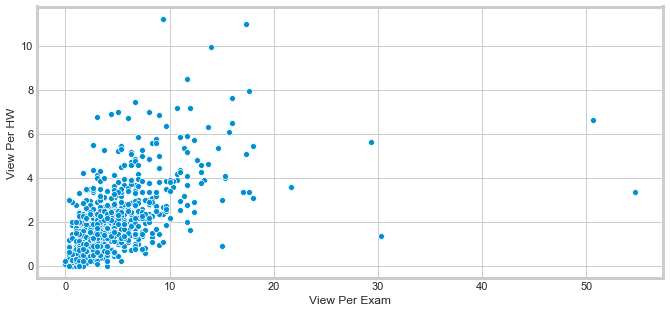

In [55]:
from exam_performance_analysis.data_exploration import hw_view_vs_exam_views

hw_view_vs_exam_views(X)

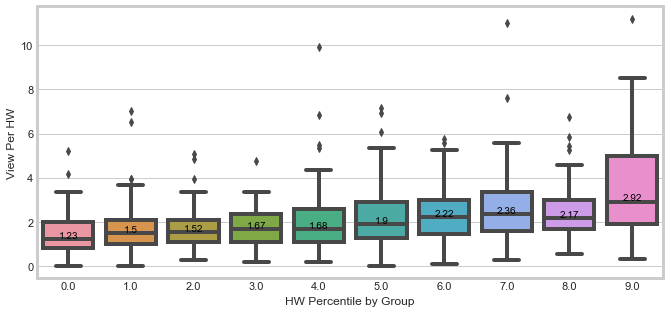

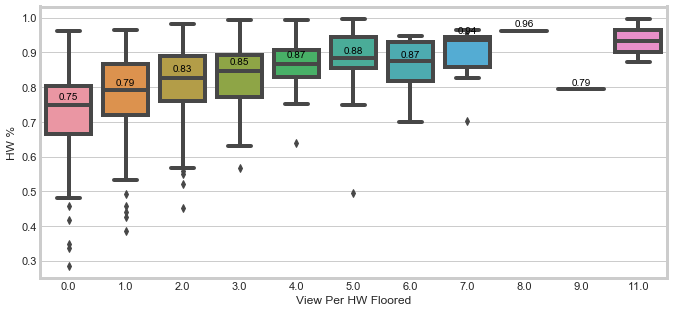

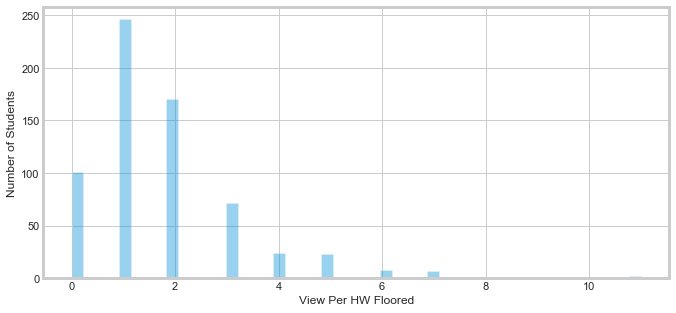

In [56]:
from exam_performance_analysis.data_exploration import hw_views_vs_hw_scores

num_groups = 10
num_entries_threshold = 10

hw_views_vs_hw_scores(X, num_groups, num_entries_threshold)

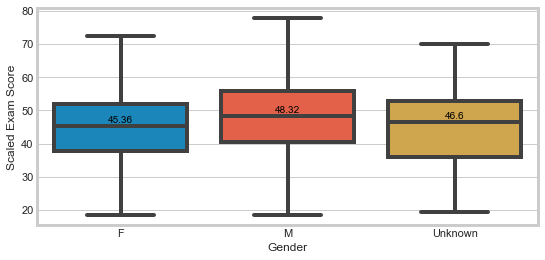

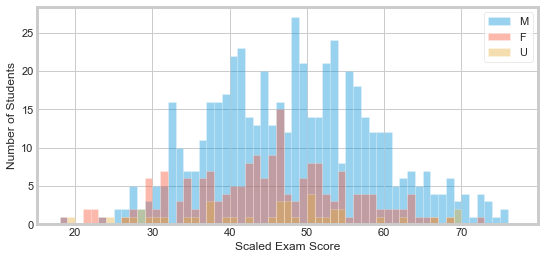

In [57]:
from exam_performance_analysis.data_exploration import gender_vs_exam_scores

gender_vs_exam_scores(X)

In [58]:
#Z statistic between the two distributions 
f_scores = X[X["Gender"]=="F"]["Scaled Exam Score"]
m_scores = X[X["Gender"]=="M"]["Scaled Exam Score"]

x_hat1 = m_scores.mean()
x_hat2 = f_scores.mean()
sigmax1 = m_scores.std()/np.sqrt(len(m_scores))
sigmax2 = f_scores.std()/np.sqrt(len(f_scores))
z_stat = (x_hat1 - x_hat2)/np.sqrt(sigmax1**2 + sigmax2**2)
print("The z statistic is %f, \n which means the two distributions are highly significantly different." % z_stat)

The z statistic is 3.668305, 
 which means the two distributions are highly significantly different.


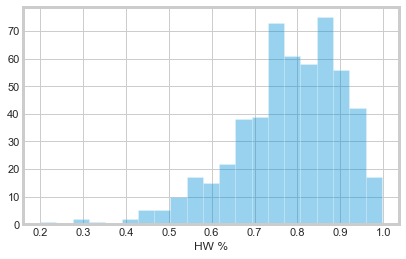

In [59]:
sns.distplot(X[X["Gender"]=="M"]["HW %"], kde=False, label="M")

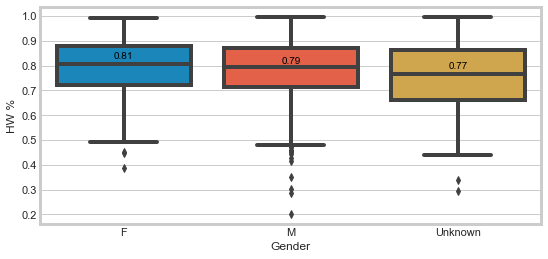

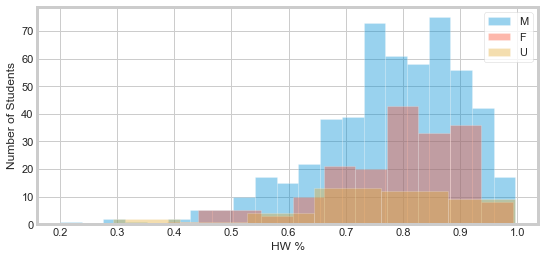

In [60]:
from exam_performance_analysis.data_exploration import gender_vs_hw_scores

gender_vs_hw_scores(X)

In [61]:
X[X["Gender"]=="M"]["Median Time Before Deadline"].describe()

count     539.000000
mean     -424.885591
std       885.000563
min     -8859.850000
25%      -324.925000
50%      -158.641667
75%      -114.900000
max        25.408333
Name: Median Time Before Deadline, dtype: float64

In [62]:
X[X["Gender"]=="F"]["Median Time Before Deadline"].describe()

count     185.000000
mean     -355.795000
std       561.179321
min     -3513.616667
25%      -372.941667
50%      -157.233333
75%       -93.816667
max        -1.200000
Name: Median Time Before Deadline, dtype: float64

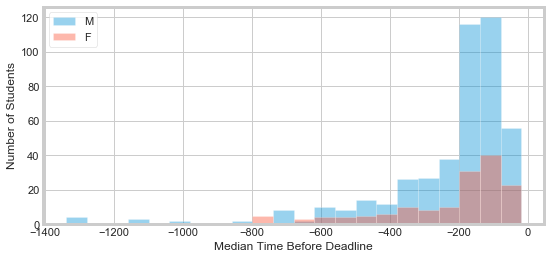

In [63]:
from exam_performance_analysis.data_exploration import gender_vs_time

gender_vs_time(X)

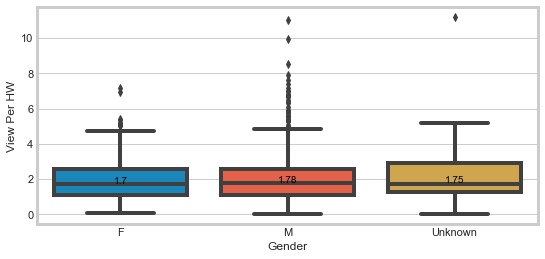

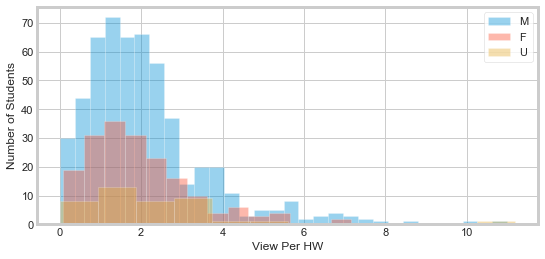

In [64]:
from exam_performance_analysis.data_exploration import gender_vs_hw_views

gender_vs_hw_views(X)

                                         PREPROCESSING

In [65]:
#convert Gender to numeric value
def transform(x):
    if x == "M":
        return 0
    elif x == "F":
        return 2
    return 1

X_ = X.copy().drop(columns="SID")
X_["Gender"] = X_["Gender"].apply(lambda x: transform(x))

In [66]:
X_.head()

,Number of Submissions,HW %,View Per HW,Mean Time Before Deadline,Median Time Before Deadline,View Per Exam,Scaled Exam Score,Gender
0,12,0.953733,2.500000,-1830.208333,-1928.566667,6.000000,50.554813,0
1,12,0.915502,3.500000,-746.387500,-251.683333,4.666667,56.435829,0
2,10,0.691244,1.700000,-4591.751667,-6028.416667,5.000000,37.867647,0
3,11,0.796083,1.454545,-88.068182,-91.608333,3.333333,50.241979,1
4,12,0.931005,2.083333,-3008.880556,-3317.016667,5.000000,70.346257,0


                                         Clustering
                                   
    Goal: see if by clustering students by homework submission times it's possible to identify study groups and the broader social network connecting students in the class. 

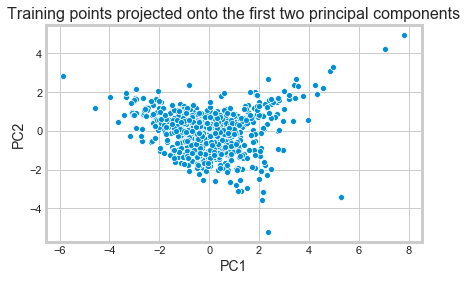

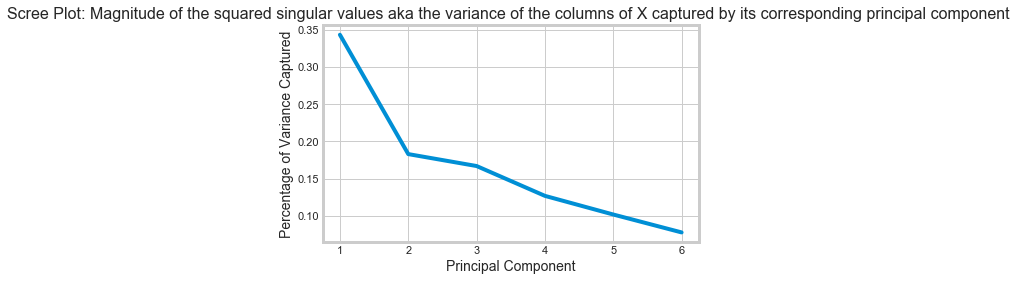

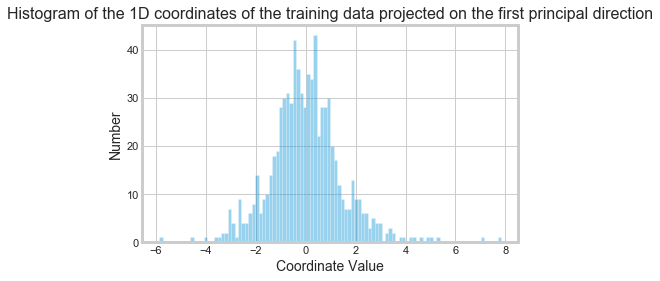

variances of features explained by singular values
[0.34 0.18 0.17 0.13 0.1  0.08]
cumulative variances of features explained by singular values
[0.34 0.53 0.69 0.82 0.92 1.  ]
sum of the squared singular values of X (normalized) == sum of the variances of the features!
6.000000000000004 5.999999999999995


In [67]:
from exam_performance_analysis.utils import standardize
from exam_performance_analysis.pca import PCA

training_std = standardize(X_, 1)
PCA(training_std)

                                  MODEL SELECTION AND EVALUATION

In [68]:
from exam_performance_analysis.model import shuffle, split

In [69]:
random_seed = 8
train_percent = 0.6
val_percent = 0.2

shuffled_train_data, shuffled_train_labels = shuffle(X_[["Number of Submissions", "HW %", "View Per HW", "Median Time Before Deadline", "View Per Exam", "Gender"]], X_["Scaled Exam Score"], random_seed)
train_data, val_data, test_data = split(shuffled_train_data, train_percent, val_percent)
train_labels, val_labels, test_labels = split(shuffled_train_labels, train_percent, val_percent)

train_data=pd.DataFrame.from_records(train_data)
val_data=pd.DataFrame.from_records(val_data)
test_data=pd.DataFrame.from_records(test_data)

##### HYPERPARAMETERS: Mixup interpolation strength, regularization, and power of polynomial kernel for ridge

In [70]:
models = ['ridge', 'ridge_sklearn', 'ridge_kernel_sklearn', 'lasso_sklearn', 'lstsq', 'lstsq_sklearn']
regularization_params = [np.arange(0.01, 10.01, 0.1), np.arange(0.01, 10.01, 0.1), np.arange(0.1, 10.01, 0.1), np.arange(0.01, 1, 0.01), [], []]
poly_kernel_params = [[], [], [1,2,3], [], [], []]

##### WITH MIXUP

In [71]:
from exam_performance_analysis.model import hyperparam_search

In [72]:
results = []

for i in range(len(models)):
    model, lowest_train_loss, lowest_val_loss, lowest_test_loss, best_params = hyperparam_search(models[i], regularization_params[i], poly_kernel_params[i], [True, False], train_data, val_data, test_data, train_labels, val_labels, test_labels)
    results.append([model, lowest_train_loss, lowest_val_loss, lowest_test_loss, best_params])
    
results_df = pd.DataFrame(np.array(results), columns=['Model', 'Lowest Training Loss (corres. to lowest val. loss)', 'Lowest Validation Loss', 'Lowest Test Loss (corres. to lowest val. loss)', 'Hyperparameters'])
results_df

,Model,Lowest Training Loss (corres. to lowest val. loss),Lowest Validation Loss,Lowest Test Loss (corres. to lowest val. loss),Hyperparameters
0,ridge,7.05781,7.34933,7.55267,"(1.01, None, True)"
1,ridge_sklearn,7.0189,7.37339,7.53174,"(0.51, None, True)"
2,ridge_kernel_sklearn,6.86402,7.38216,8.02344,"(5.4, 3, True)"
3,lasso_sklearn,7.02357,7.39521,7.62504,"(0.04, None, True)"
4,lstsq,7.01182,7.45162,7.50014,"(None, None, True)"
5,lstsq_sklearn,7.00404,7.4,7.61314,"(None, None, True)"


##### WITHOUT MIXUP

In [73]:
results = []

for i in range(len(models)):
    model, lowest_train_loss, lowest_val_loss, lowest_test_loss, best_params = hyperparam_search(models[i], regularization_params[i], poly_kernel_params[i], [False], train_data, val_data, test_data, train_labels, val_labels, test_labels)
    results.append([model, lowest_train_loss, lowest_val_loss, lowest_test_loss, best_params])
    
results_without_mixup_df = pd.DataFrame(np.array(results), columns=['Model', 'Lowest Training Loss (corres. to lowest val. loss)', 'Lowest Validation Loss', 'Lowest Test Loss (corres. to lowest val. loss)', 'Hyperparameters'])
results_without_mixup_df

,Model,Lowest Training Loss (corres. to lowest val. loss),Lowest Validation Loss,Lowest Test Loss (corres. to lowest val. loss),Hyperparameters
0,ridge,7.0064,7.40025,7.54318,"(0.01, None, False)"
1,ridge_sklearn,7.0064,7.40025,7.54318,"(0.01, None, False)"
2,ridge_kernel_sklearn,7.00599,7.40237,7.54417,"(0.1, 1, False)"
3,lasso_sklearn,7.00541,7.40324,7.54595,"(0.01, None, False)"
4,lstsq,7.00642,7.40001,7.54324,"(None, None, False)"
5,lstsq_sklearn,7.00642,7.40001,7.54324,"(None, None, False)"


                          FEATURE SELECTION TO DETERMINE MOST PREDICTIVE FEATURES

In [74]:
features = ["Number of Submissions", "HW %", "View Per HW", "Median Time Before Deadline", "View Per Exam", "Gender"]
features

['Number of Submissions',
 'HW %',
 'View Per HW',
 'Median Time Before Deadline',
 'View Per Exam',
 'Gender']

In [75]:
#1. USE LASSO AS A FEATURE SELECTOR

LASSO sends weights to 0 of features in the following order:
- "View per HW"
- "View per Exam"
- "Gender"
- "Median Time"
- "Number of Submissions"
- "Scaled HW Score Percentile"

In [76]:
#2. SUBSET SELECTION (USING BEST MODEL BASED ON VALIDATION ACCURACY ABOVE)

In [77]:
best_model = results_df.sort_values(by="Lowest Validation Loss").iloc[0]
best_model

Model                                                              ridge
Lowest Training Loss (corres. to lowest val. loss)               7.05781
Lowest Validation Loss                                           7.34933
Lowest Test Loss (corres. to lowest val. loss)                   7.55267
Hyperparameters                                       (1.01, None, True)
Name: 0, dtype: object

In [78]:
from exam_performance_analysis.feature_selection import subset_selection

pd.set_option('display.max_rows', 100)
losses = subset_selection(best_model, train_data, val_data, test_data, train_labels, val_labels, test_labels)
losses

,Training Loss,Validation Loss,Test Loss
Features,,,
"[0, 1, 3, 4]",7.061630,7.398995,7.727740
"[0, 1, 2, 3, 4]",7.034342,7.433429,7.646238
"[0, 1, 3, 4, 5]",7.008397,7.445868,7.491200
"[0, 1, 2, 3, 4, 5]",7.000757,7.456541,7.537126
"[0, 1, 2, 3]",7.043504,7.474495,7.714056
"[0, 1, 3]",7.077858,7.485841,7.750037
"[0, 1, 2, 3, 5]",7.036478,7.500049,7.391456
"[0, 1, 3, 5]",7.036007,7.522393,7.542602
"[0, 1, 4]",7.144695,7.530744,7.717605


                                     COMPARISON TO RANDOM GUESS

In [79]:
#RANDOM GUESS
std = np.sqrt(np.sum(np.square(test_labels-np.mean(test_labels)))/len(test_labels-1))
mean = np.average(test_labels)
num_samples = 10000

avg_differences = []
for i in range(num_samples):
    sample=np.random.normal(mean, std, len(test_labels))
    avg_differences.append(np.average(np.abs(sample-test_labels)))

final_avg_loss = np.average(avg_differences)

print("Standard Deviation of Scores: " + str(std))
print("Random Abs. Loss: " +str(final_avg_loss))

Standard Deviation of Scores: 11.632597435511684
Random Abs. Loss: 13.170457181541776


In [80]:
best_model_loss = losses.sort_values(by = "Validation Loss", ascending = True)["Test Loss"].iloc[0]
percent_improvement = np.abs((best_model_loss - final_avg_loss)/final_avg_loss)*100

print("Model improvment to random guess: " + str(np.round(percent_improvement,1)) + "%")
print("Model average distance from mean (in std): " + str(np.round(best_model_loss/std,2)))

Model improvment to random guess: 41.3%
Model average distance from mean (in std): 0.66
